Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [17]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# config inline plots
%matplotlib inline
# set seaborn style
sns.set_style('darkgrid')

## Part 1

In [18]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

#### Explain the data pre-processing highlighted in the notebook

1. `x_train /= 255` and `x_test /= 255` is used to normalize the pixel value in a range $(0, 1]$ (that is the greyscale).

2. `y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)` and `y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)` is basically one hot encoding of the category target labels.

---

## Part 2

In [20]:
## Define model ##
model = Sequential()

model.add(Flatten()) # Flatten() Flattens the input. Does not affect the batch size.
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

#### 2.1 How  many  layers  does  the  network  in  the  notebook  have?  How  many  neurons  does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

There are 4 layers in the initial neural network.

- The first input layer, with the same dimension as the number of feature we have for each datapoint. In the the MNIST dataset case, the features corresponds to the number of pixels in an image. In this case, the input layer has $28 \times 28 = 784$ neurons. 
- The next 2 layers are hidden layers, with 64 neurons each. The number of neurons in these case are usally decided based on the neural network adjustment in order to improve its performace. But in general, It should be less than the the number in the input layer. In both the hidden layers the activation function used is the ReLU. ReLU is flat only for negative values, instead of also for high numbers: this feature can help making the gradient descent algorithm faster, since there will be less places where the function will be flat (thus, less places where the learning is slowed down).
- The last one is the output layers. It has 10 neurons, one for each possible number in the MNIST dataset. Since we have 10 different choices, we can also represent the output layer with just 4 neurons; the number, in that case, would be represented by its binary representation (we could use 4 neurons for numbers from 0 to 12). Since It's a multi-class classification problem, the softmax activation function is used. It's a generaliztion of the logistic function, suitable for more than 2 classes.

#### 2.2 What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function used to train the neural network is the **categorical cross-entropy loss**, a weighted average of the log loss for each class. It's defined as follows:

$L(y, \hat{y}) = -\sum_{i}^C y_i \log (\frac{e^{\hat{y}_i}}{\sum_{j}^C e^{\hat{y}_j}})$

Where:

- $L(y, \hat{y})$ is the category cross-entropy loss definition.
- $C$ is the total number of predictable classes.
- $y$ is the one-hot encoded vector with the the true ground labels (only one element will be non-zero, which is the true class).
- $\hat{y}$ is the array of the predicted class probabilities by the neural network.
- $\frac{e^{\hat{y}_i}}{\sum_{j}^C e^{\hat{y}_j}}$ is the probability of the class $p$ being predicted (the softmax function).

The loss function above results appropriate in this multi-class classification task. This mainly beacuse:
- in multi-class classification task It would result in a natural way to asses the performance of the neural network, since It easly allow to compare the obtained probabilities with the true labels;
- the loss function outputs non-negative and continuous values, ideal for optimization algorithms such as the gradient descent (It would produce a continuous and smooth loss surface).

#### 2.3 Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4742 - accuracy: 0.8631 - val_loss: 0.2487 - val_accuracy: 0.9292
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2254 - accuracy: 0.9341 - val_loss: 0.1865 - val_accuracy: 0.9428
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1766 - accuracy: 0.9482 - val_loss: 0.1623 - val_accuracy: 0.9512
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1466 - accuracy: 0.9570 - val_loss: 0.1382 - val_accuracy: 0.9580
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9628 - val_loss: 0.1331 - val_accuracy: 0.9594
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9672 - val_loss: 0.1116 - val_accuracy: 0.9669
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.9713 - val_loss: 0.1106 - val_accuracy: 0.9664
Epoch 

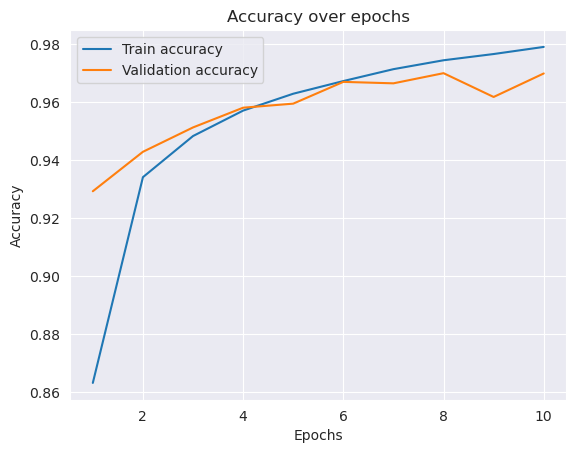

In [21]:
fit_info = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

train_scores = fit_info.history['accuracy']
val_scores = fit_info.history['val_accuracy']

# Create the plot
fig, ax = plt.subplots()

sns.lineplot(x=np.arange(1, 11), y=train_scores, label='Train accuracy', ax=ax)
sns.lineplot(x=np.arange(1, 11), y=val_scores, label='Validation accuracy', ax=ax)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy over epochs')

ax.legend()
plt.show()


As we can notice from the accuracy plot, after the 4th epoch the neural network starts to overfit.

#### 2.4 Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization  factor. How close do you get to Hintons result? If you do not get the same results, what factors may influence this?

In [22]:
def improved_nn(reg_facor=0):
  """
  Train a neural network with two hidden layers with 500 and 300 neurons respectively. Also add L2 regularization to the weights of the hidden layers.
  The function then returns the validation accuracy of the model. 
  """
  
  model = Sequential()

  model.add(Flatten())
  model.add(Dense(500, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_facor)))
  model.add(Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_facor)))
  model.add(Dense(num_classes, activation='softmax'))


  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
                metrics=['accuracy'])

  fit_info = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=40,
                      verbose=0,
                      validation_data=(x_test, y_test))
  
  # return the validation accuracy  
  return model.evaluate(x_test, y_test, verbose=0)[1]


In [23]:
def avg_std_3nn_val_score(reg_factor):
  """
  Given a regularization factor, train 3 replicate neural networks with that regularization 
  factor and return the average and standard deviation of the validation accuracy.
  """
  
  val_scores = [val_scores.append(improved_nn(reg_factor)) for i in range(3)]
    
  return np.mean(val_scores), np.std(val_scores)

In [24]:
print(f'Validation accuracy of the improved neural network: {improved_nn()}')

Validation accuracy of the improved neural network: 0.9810000061988831
